In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse as sp
import cv2

Exercice 1 :
Gradient Morphologique

But de l'exercice : 
Enlever le reflet sur l'ampoule, et regarder le gradient entre avant et après.

Résolution : On a fait une ouverture(enleve les petites zones d'intensité élevé)

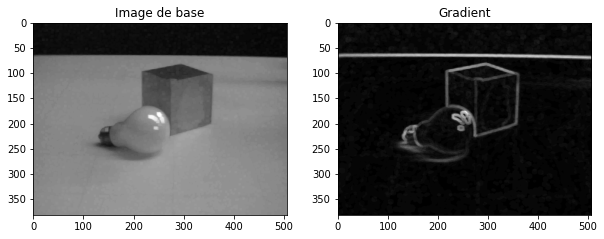

In [2]:
image = cv2.imread('Ampoule.png',0)
S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
imageE = cv2.erode(image,S,iterations = 1)
imageD = cv2.dilate(image,S,iterations = 1)
gradient = imageD - imageE

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title("Image de base")
plt.imshow(image,'gray') # affichage de l'image I en niveau de gris

plt.subplot(122)
plt.title("Gradient")
plt.imshow(gradient,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

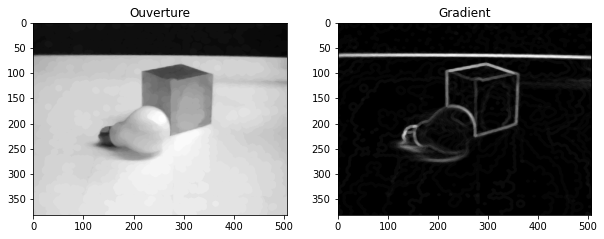

In [3]:
S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))
I = image
Ouver = cv2.morphologyEx(I, cv2.MORPH_OPEN, S)

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
imageEO = cv2.erode(Ouver,S,iterations = 1)
imageDO = cv2.dilate(Ouver,S,iterations = 1)
gradient2 = imageDO - imageEO

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title("Ouverture")
plt.imshow(Ouver,'gray') # affichage de l'image I en niveau de gris

plt.subplot(122)
plt.title("Gradient")
plt.imshow(gradient2,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

Plus l'élément structurant de l'image augmente, plus l'image après ouverture devient claire plus homogène mais les détails ne se distinguent plus et les lignes "fondent" lors du calcul du gradient
Si on augmente l'élémnt structurant du gradient, le résultat va devenir floue.

Exercice 2 /////////////////////////////////////////////////////////////////////////////////////////////////////////////////

But de l'exercice : 
Calculer le nombre de cercle noir de l'image

Résolution :
On met l'image en négatif afin d'avoir des cercles blancs.
On calcule notre image des distances : plus un pixel est loin d'un bords, plus il est blancs.
On fait un seuillage pour récuperer l'intérieur des cercles et donc séparer nos cercle.
On utilise la fonction cv2.connectComponent

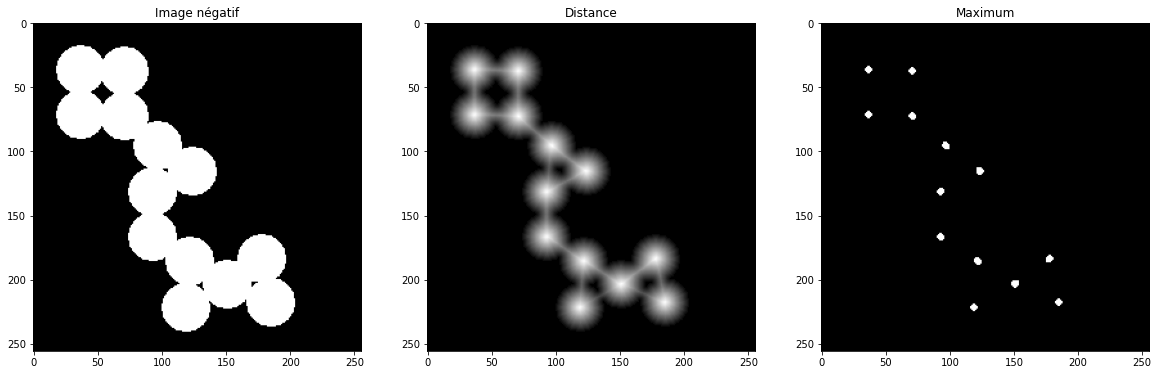

il y :  14  elements dans l'image avec le fond


In [4]:
image = cv2.imread('blobs2.png',0)

I_image = np.invert(image)
Dist = cv2.distanceTransform(I_image,cv2.DIST_L2,5,cv2.CV_32F)

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,19))
Erod = cv2.erode(Dist, S, iterations = 1)

seuil = 7
Erod[Erod<=seuil]=0
Erod[Erod>seuil]=1

i = cv2.connectedComponents(Erod.astype(np.uint8))

plt.figure(figsize=(20,20))

plt.subplot(131)
plt.title("Image négatif")
plt.imshow(I_image,'gray') # affichage de l'image I en niveau de gris

plt.subplot(132)
plt.title("Distance")
plt.imshow(Dist,'gray') # affichage de l'image I en niveau de gris

plt.subplot(133)
plt.title("Maximum")
plt.imshow(Erod,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

print("il y : ",i[0]," elements dans l'image avec le fond")

Exercice 3 ///////////////////////////////////////////////////////////////////////////////////////////////////////////

But de l'exercice :
Faire ressortir les structure vasculaire

Résolution :
Nous pouvons voir que les vaisseaux sanguin ont des fortes intensité et des contours bien marqués. Nous avons donc 2 solution :
- le gradient, qui va nous permettre de faire ressortir les hautes fréquences donc les contours de nos vaisseaux
- le top hat qui fait ressortir les éléments de fortes intensité

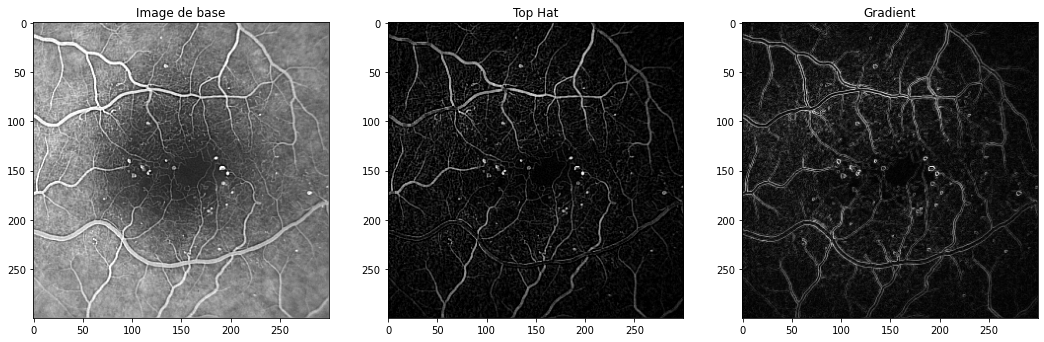

In [5]:
image = cv2.imread('angiogram.png',0)

# Top Hat pour ne garder que les détails clair
S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
Top = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, S)

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
imageE = cv2.erode(image,S,iterations = 1)
imageD = cv2.dilate(image,S,iterations = 1)
gradient = imageD - imageE



plt.figure(figsize=(18,18))

plt.subplot(131)
plt.title("Image de base")
plt.imshow(image,'gray') # affichage de l'image I en niveau de gris

plt.subplot(132)
plt.title("Top Hat")
plt.imshow(Top,'gray') # affichage de l'image I en niveau de gris

plt.subplot(133)
plt.title("Gradient")
plt.imshow(gradient,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

Nous pouvons voir que le top hat est plus efficace car il met en évidence les détails avec une intensité élevés alors que le gradient ne met en évidenc que les contours de notre structures vasculaires.

Exercice 4 ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Cas 1

But de l'exercice :
Supprimer tous les caractères d'une calculette ayant des longs traits verticaux

Résolution : 
On fait une érosion de notre image par un élément structurant très grand en hauteur afin de ne récupérer des marqueurs dans chaque élément ayant un long trait vertical.
On refait une reconstruction géodésique avec notre image de départ.
On fait un top hat afin de faire ressortir nos éléments reconstruit et n'avoir que eux.
On soustrait à notre image de départ notre image obtenue.

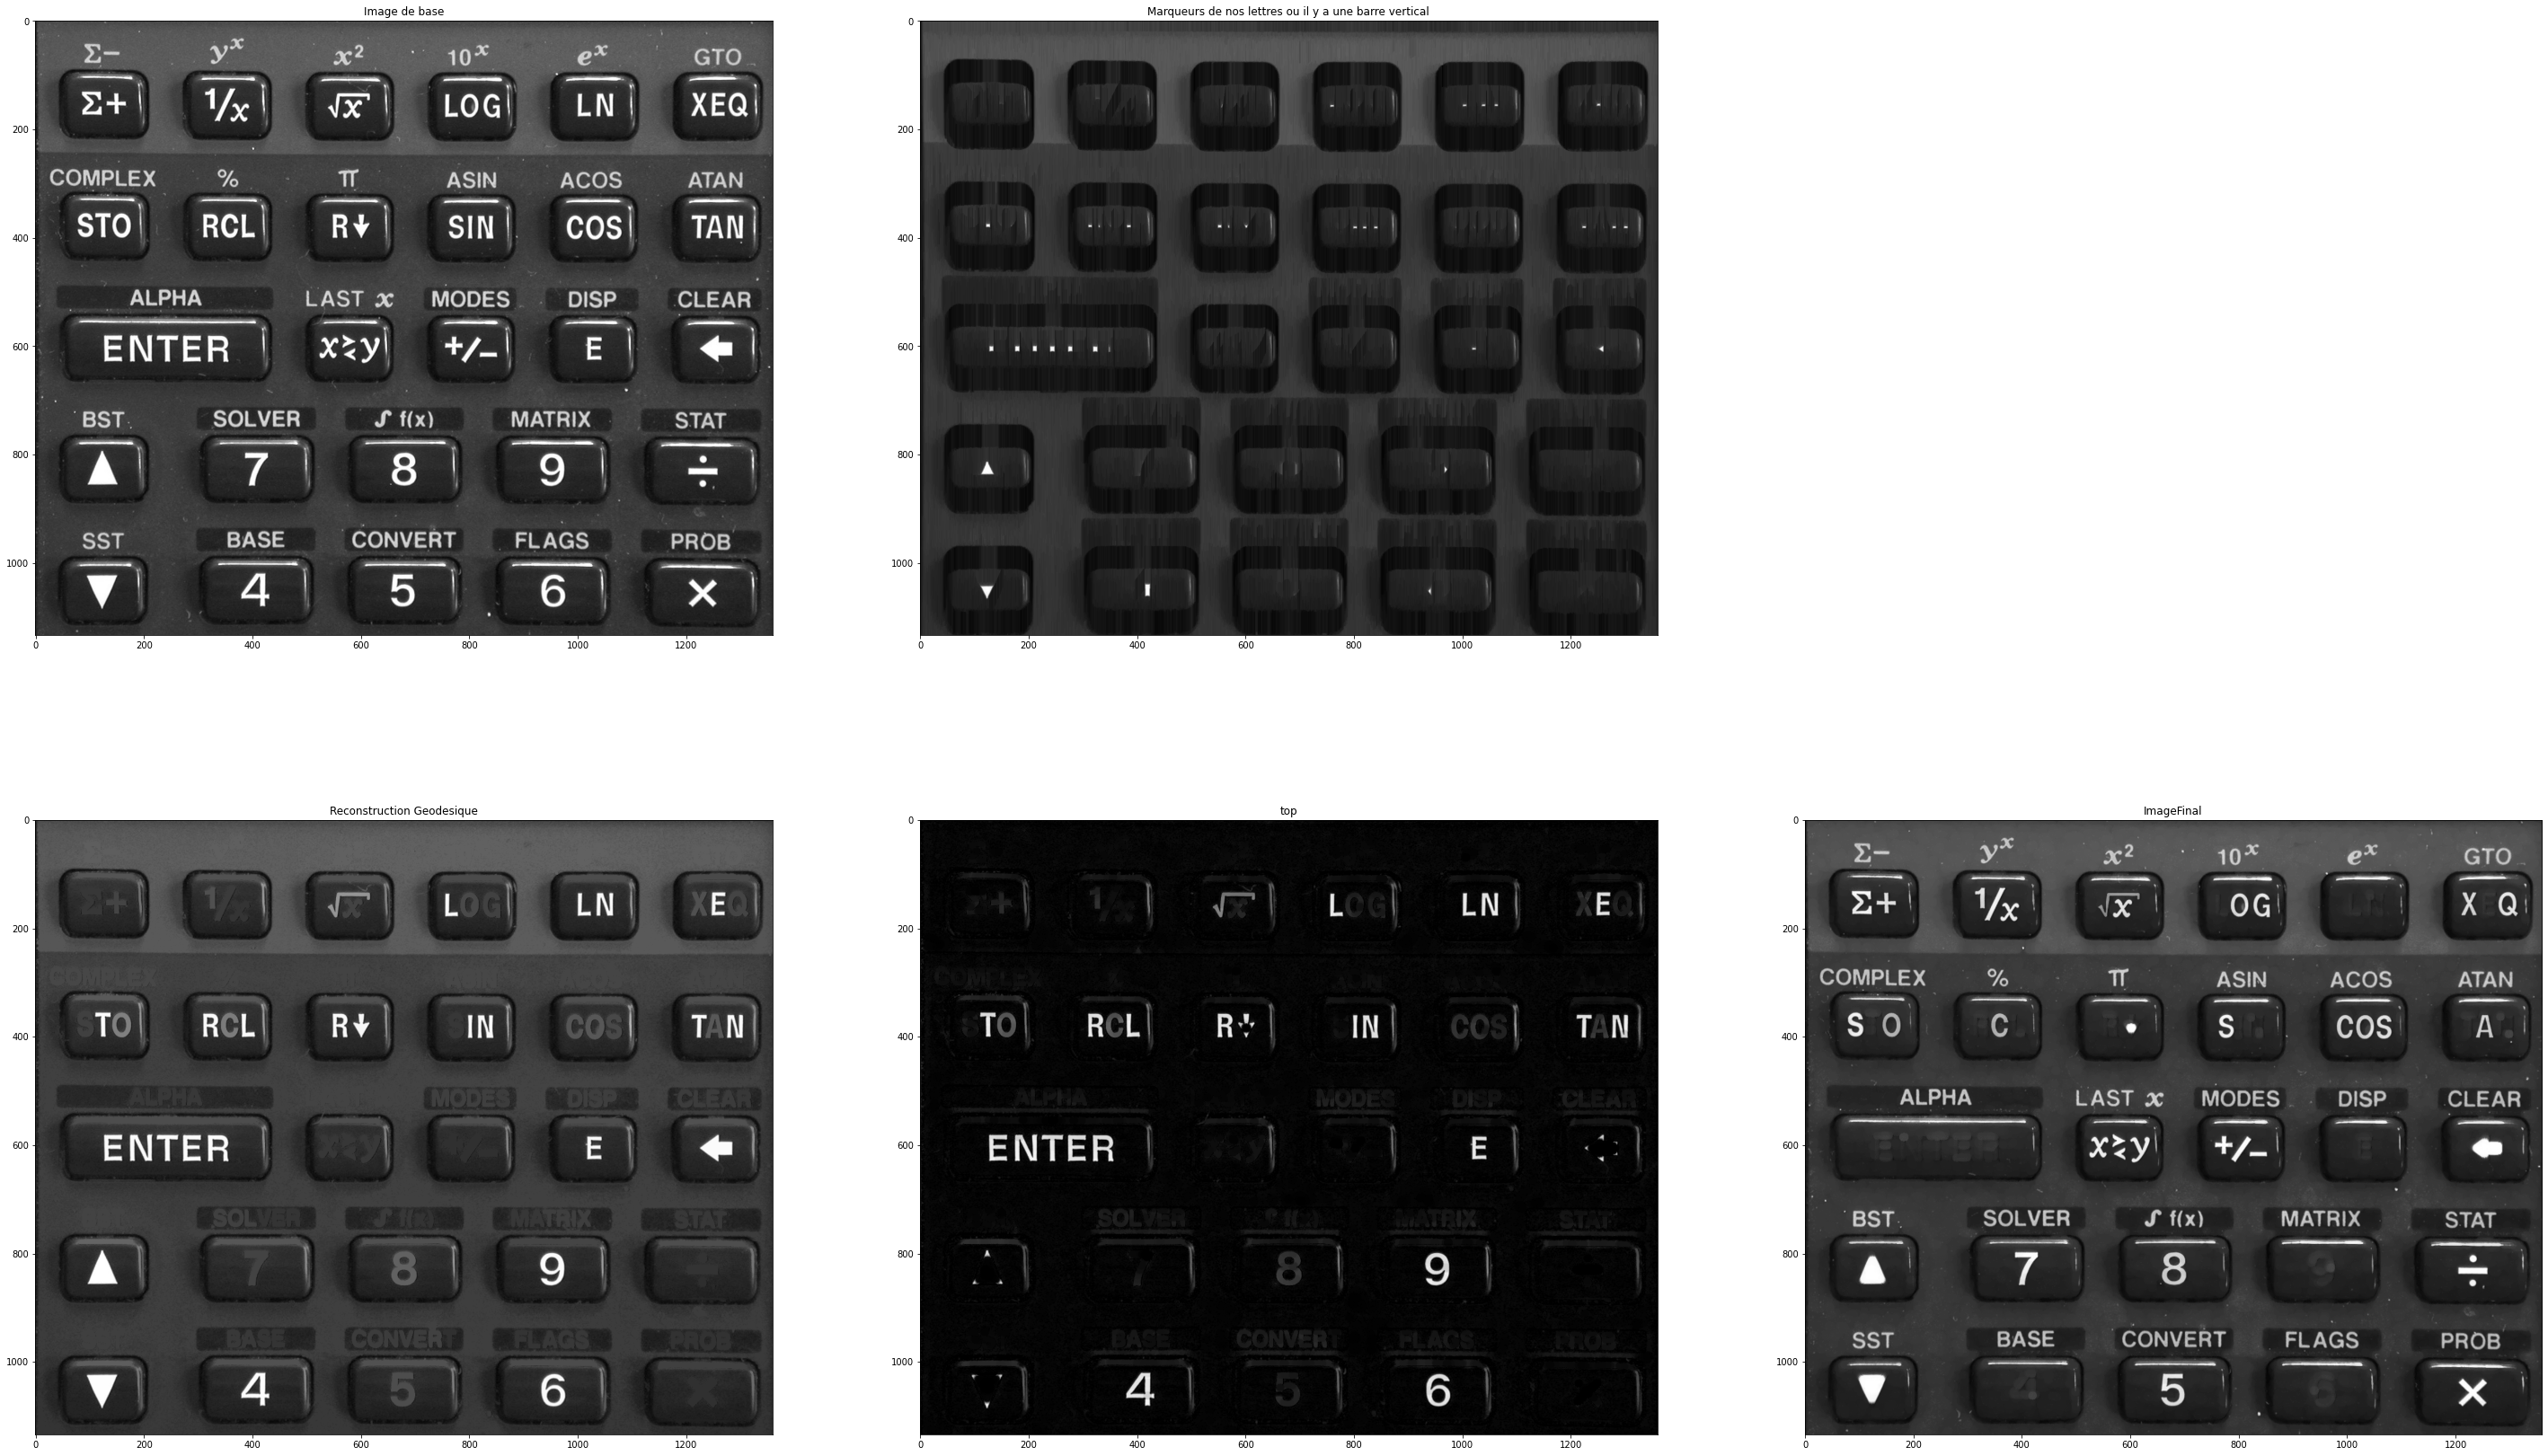

In [6]:
image = cv2.imread('calculator.png',0)

# prend une structure rectangulaire et fait une érosion dessus pour ne garder que les points qui appartiennent à des lettres avec des grandes lignes
S = cv2.getStructuringElement(cv2.MORPH_RECT,(1,40))
Erod = cv2.erode(image, S, iterations = 1)  # On a récupérer nos marqueurs avec un marqueurs dans chaque éléments contenant une barre vertical

# On reprend une structure en ellipse pour pouvoir faire une reconstruction geodésique et prendre toute le lettres ou il y a une barre vertical
S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))

plt.figure(figsize=(50,30))

plt.subplot(231)
plt.title("Image de base")
plt.imshow(image,'gray') # affichage de l'image I en niveau de gris

plt.subplot(232)
plt.title("Marqueurs de nos lettres ou il y a une barre vertical")
plt.imshow(Erod,'gray') # affichage de l'image I en niveau de gris

ReconsGeode = Erod

# On faire une premiere reconstruction géodésique
# c'es à dire que l'on fait une dilatation puis on récupère le minimum entre l'image d'origine et l'image dilatée
Dilat = cv2.dilate(ReconsGeode, S, iterations = 1)
U = np.minimum(Dilat,image)

s = np.size(U)
while (np.linalg.norm(np.reshape(U,s))-np.linalg.norm(np.reshape(ReconsGeode,s))) != 0 : #Tant que la reconstruction n'est pas finie
    # donc que les normes ne sont pas égale
    ReconsGeode = U
    Dilat = cv2.dilate(ReconsGeode, S, iterations = 1)
    U = np.minimum(Dilat,image)

######### Même chose que le while sauf que on met un compteur donc moins ouf
for i in range(1,40):
    Dilat = cv2.dilate(ReconsGeode, S, iterations = 1)
    U = np.minimum(Dilat,image)
    ReconsGeode = U

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
Top = cv2.morphologyEx(ReconsGeode, cv2.MORPH_TOPHAT, S)
ImageFinal = image - Top

plt.subplot(234)
plt.title("Reconstruction Geodesique")
plt.imshow(ReconsGeode,'gray') # affichage de l'image I en niveau de gris

plt.subplot(235)
plt.title("top")
plt.imshow(Top,'gray') # affichage de l'image I en niveau de gris

plt.subplot(236)
plt.title("ImageFinal")
plt.imshow(ImageFinal,'gray') # affichage de l'image I en niveau de gris

plt.show() # déclenche l'affichage

CAS 2 

But de l'exercice :
1. Enlever les points blancs des dés
2. Enlever les points noir des dés

Résolution :
1. Possibilité 1 : On fait une érosion par un élément structurant assez grand pour faire disparaître les points, on gardera toujours une trace de blanc sur nos autres dés à fond blanc ce qui nous permet de mettre en place une reconstruction géodésique.
Possibilité 2 :
On fait une ouverture qui permet d'éliminer les petites régions d'intensité clair. En faisant cela on a degradé nos dés. On fait donc une reconstruction géodésique (avec notre image de base) pour retrouver notre image d'origine sans les points blancs sur nos dés noir.

2. On pourrait vouloir faire une fermeture mais lorsque l'on voudra reconstruire nos dées noir nous ne pourront pas car nous étendrons le blanc et prendrons le minimum entre notre image d'origine et la nouvelle image se qui fera réaparraitre les points noir. Cela n'est donc pas aussi simple
Une facons de faire est :
- Faire une fermeture afin de faire disparaitres les petites régions d'intensité sombre (nos points noir)
- Inverser notre image
- Faire une reconstruction géosédique avec notre image de base inversé
- Réinverser l'image obtenue

Le code qui est mis en place ci dessous est une autre version similaire. Elle suit les étapes suivantes :
- on inverse notre image, les points noirs sont donc maintenant blanc
- on fait une ouverture afin d'éliminer les petites régions clair (nos points)
- on fait une reconstruction géodésique avec notre image inversée
- on réinverse l'image obtenue

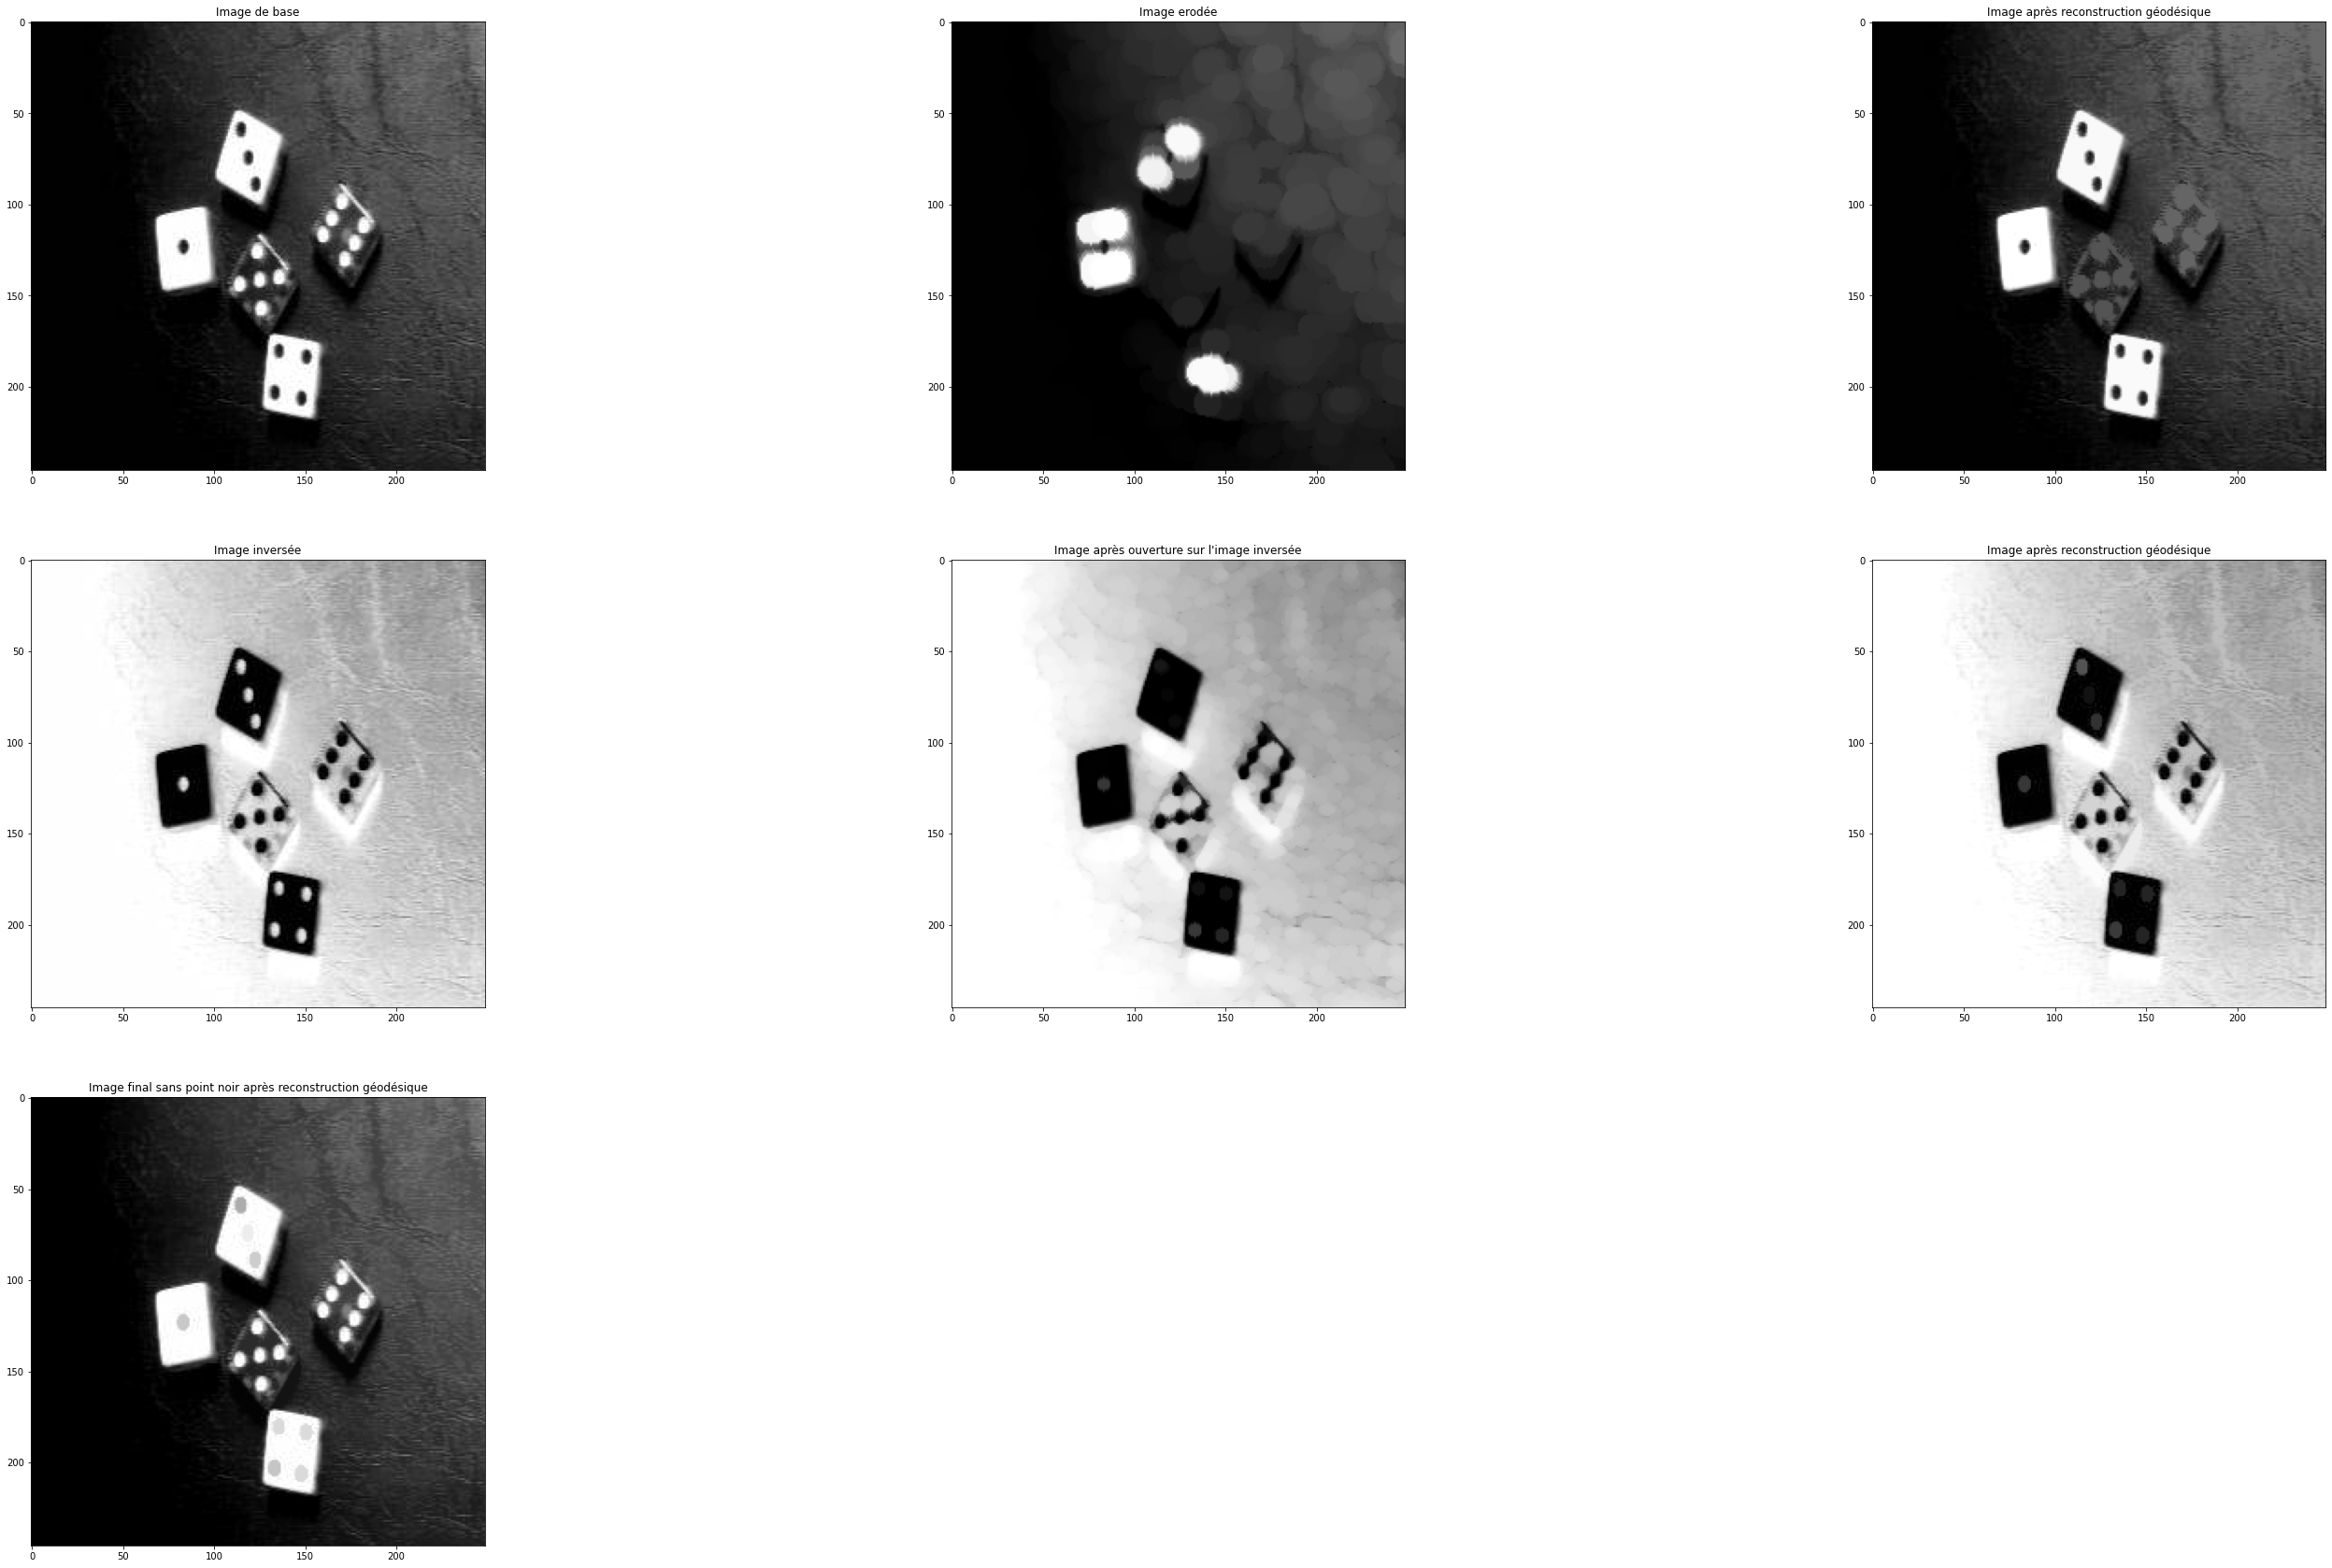

In [7]:
image = cv2.imread('des.jpg',0) # image de base
imageI = 255 - image # image inversée

# CAS 1

# Première possibilité non utilisé ici
S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
Erod = cv2.erode(image, S, iterations = 1) 
#####

# Seconde possibilitée
S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
Erod = cv2.morphologyEx(image,cv2.MORPH_OPEN, S)

### Reconstruction géodésique :
ReconsGeode = Erod

# On faire une premiere reconstruction géodésique
# c'es à dire que l'on fait une dilatation puis on récupère le minimum entre l'image d'origine et l'image dilatée
Dilat = cv2.dilate(ReconsGeode, S, iterations = 1)
U = np.minimum(Dilat,image)


s = np.size(U)
while (np.linalg.norm(np.reshape(U,s))-np.linalg.norm(np.reshape(ReconsGeode,s))) != 0 : #Tant que la reconstruction n'est pas finie
    # donc que les normes ne sont pas égale
    ReconsGeode = U
    Dilat = cv2.dilate(ReconsGeode, S, iterations = 1)
    U = np.minimum(Dilat,image)
     
####
# Création de notre image final (ici c'est directement notre image reconstruite)
imageF1 = np.copy(ReconsGeode)


# CAS 2


S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
Ouvert = cv2.morphologyEx(imageI,cv2.MORPH_OPEN, S)

### Reconstruction géodésique :
ReconsGeode = Ouvert
# On faire une premiere reconstruction géodésique
# c'es à dire que l'on fait une dilatation puis on récupère le minimum entre l'image d'origine et l'image dilatée
Dilat = cv2.dilate(ReconsGeode, S, iterations = 1)
U = np.minimum(Dilat,imageI)

s = np.size(U)
while (np.linalg.norm(np.reshape(U,s))-np.linalg.norm(np.reshape(ReconsGeode,s))) != 0 : #Tant que la reconstruction n'est pas finie
    # donc que les normes ne sont pas égale
    ReconsGeode = U
    Dilat = cv2.dilate(ReconsGeode, S, iterations = 1)
    U = np.minimum(Dilat,imageI)
  
###
# Création de notre image final (ici on l'inverse)
imageF2 = 255 - ReconsGeode


# Affichage
plt.figure(figsize=(50,30))

plt.subplot(331)
plt.title("Image de base")
plt.imshow(image,'gray') # affichage de l'image I en niveau de gris

plt.subplot(332)
plt.title("Image erodée")
plt.imshow(Erod,'gray') # affichage de l'image I en niveau de gris

plt.subplot(333)
plt.title("Image après reconstruction géodésique")
plt.imshow(imageF1,'gray') # affichage de l'image I en niveau de gris

plt.subplot(334)
plt.title("Image inversée")
plt.imshow(imageI,'gray') # affichage de l'image I en niveau de gris

plt.subplot(335)
plt.title("Image après ouverture sur l'image inversée")
plt.imshow(Ouvert,'gray') # affichage de l'image I en niveau de gris

plt.subplot(336)
plt.title("Image après reconstruction géodésique")
plt.imshow(ReconsGeode,'gray') # affichage de l'image I en niveau de gris

plt.subplot(337)
plt.title("Image final sans point noir après reconstruction géodésique")
plt.imshow(imageF2,'gray') # affichage de l'image I en niveau de gris



plt.show()

- Ouverture : D(E(I))   --> élimine les petites régions d'intensité claire
- Fermeture : E(D(I))   --> élimine les petites régions d'intensité sombre
- Lissage   : F(O(I))   --> supprime les hautes fréquences
- Gradient  : D(I)-E(I) --> fait ressortir les régions de forte intensitées (hautes fréquences, bordures)
- Top Hat   : I-O(I)    --> ressort les détails d'intensitées élevées
- Bottom Hat: F(I)-I    --> ressort les détails d'intensitées sombre

Explication d'une reconstruction géodésique :
- Soit I notre image d'origine
- Prenons une image I1 avec des marqueurs comme l'image 2 de la calculatrice. 
- A chaque itération on va calculer une nouvelle image qui sera la dilation de l'image I1 par un élément structurant choisis au préalable, on "étale" donc le blanc que nous avons dans I1. Cela nous donne I2. 
- Après avoir obtenue I2, nous créons I3 en prenant le minimum pixel par pixels entre I2 et I. Cela nous permet de faire en sorte de remettre à leur intensité initiale les pixels que nous avons étalé en dehors de la forme que nous reconstruisons sur notre image.
- Nous arrêtons la boucle lorsque I3 n'as pas changé entre 2 itérations, donc lorsque la différence des normes vaut 0.

Commandes python :

- cv2.imread('title.png',0) --> ouverture d'une image et conversion en niveau de gris

- S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)) 
ou cv2.MORPH_RECT,(1,40) pour avoir en rectangle au lieu de ellipse

- cv2.erode(I,S,iterations=n) --> n erosions successives de I par S
- cv2.dilate(I,S,iterations=n) --> n dilatation successives de I par S
- cv2.morphologyEx(I,cv2.MORPH_OPEN,S) --> ouverture de I par S
- cv2.morphologyEx(I,cv2.MORPH_CLOSE,S) --> fermeture de I par S
- cv2.morphologyEx(I,cv2.MORPH_TOPHAT,S) --> top-hat de I par S
- cv2.morphologyEx(I,cv2.MORPH_BLACKHAT,S) --> bottom-hat de I par S

- cv2.distanceTransform() --> pour le calcul des distances, voir LPE smarties

- np.minimum(A,B) --> retourne le minimum élément par élément des arrays A et B (donc aussi images)

- 255 - image : inversion de l'image


Au cas ou :
- /opt/python/cpe-imi/bin/python3